# AI Project 5

In this project you will complete the provided Python code, using Tensorflow, to perform image classification on the Fashion-MNIST using various CNN architectures. 

## **Important!** 
Make sure you change your runtime type to GPU or TPU! This can be found in the top menu following "Runtime->Change runtime type" then select from the dropdown either gpu or tpu.



## Imports, Data, and Hyperparameters

### Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import numpy
import matplotlib.pyplot as plt

import time

print(tf.__version__)

2.4.1


### Data

In [ ]:
data = tf.keras.datasets.fashion_mnist

# Separate data into train and test
(train_data, train_labels), (test_data, test_labels) = data.load_data()

# get info about data
train_size = len(train_data)
test_size = len(test_data)
data_shape = train_data[0].shape
num_classes = len(set(test_labels))

print(
    "There are ",
    train_size,
    " training examples and ",
    test_size,
    " testing examples with ",
    num_classes,
    " classes",
)

4423680/4422102 [==============================] - 0s 0us/step
There are  60000  training examples and  10000  testing examples with  10  classes


### Preprocessing

In [ ]:
print("Each image is of shape ", data_shape)

### Preproccess Data ###
train_data = train_data / 255
train_data = train_data.reshape(train_size, data_shape[0], data_shape[1], 1)
test_data = test_data / 255
test_data = test_data.reshape(test_size, data_shape[0], data_shape[1], 1)

data_shape = train_data[0].shape
print("New image shape is ", data_shape)

Each image is of shape  (28, 28)
New image shape is  (28, 28, 1)


### Global Hyperparameters

In [ ]:
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
EPOCHS = 10

## **Part 1 - The Effect of Filters**

In this section you will be comparing the relative performance and training times for two different CNN architectures. 

Both architectures will have the following layers in order:

``` Python
Conv2D <- input layer provided
Conv2D
MaxPooling2D((2,2))
Conv2D
Conv2D
MaxPooling2D((2,2))
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax) <- output layer provided
```

The input layers and output layer will be provided. 

In ```build_model_1A()``` the first two Conv2D layers should have 16 filters, and the second two Conv2D layers should have 32 filters.

In ```build_model_1B()``` the first two Conv2d layers should have 64 filters, and the second two Conv2D layers should have 128 filters.

All layers, except the output layer which is provided, should have ```activation="relu"```. Also all the Conv2D layers should have ```padding="same"``` and ```kernal_size=(3,3)``` passed as arguements.

Finally both max pooling layers should have a pool size of (2, 2)

**Documentation for the each layer type:**

*Conv2D*: https://keras.io/api/layers/convolution_layers/convolution2d/

*MaxPooling2D*: https://keras.io/api/layers/pooling_layers/max_pooling2d/

*Flatten*: https://keras.io/api/layers/reshaping_layers/flatten/

*Dense*: https://keras.io/api/layers/core_layers/dense/

**Documentation for Sequential model**: https://keras.io/guides/sequential_model/

### ***TODO*** Model 1A

In [ ]:
def build_model_1A():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=16,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.Conv2D(filters=16, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=32, activation="relu", padding="same", kernel_size=(3,3)),
        layers.Conv2D(filters=32, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # !!! Your layers here !!!
        layers.Flatten(),
        layers.Dense(1024),
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### ***TODO*** Model 1B

In [ ]:
def build_model_1B():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # !!! Your layers here !!!
        layers.Flatten(),
        layers.Dense(1024),
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summaries

Compiles and prints summaries for the two architectures. Do not change.


In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get networks
model_1a = build_model_1A() 
model_1b = build_model_1B()


# compile networks
model_1a.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model_1b.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summaries

print("\nModel 1A Architecture\n")
model_1a.summary()

print("\nModel 1B Architecture\n")
model_1b.summary()


Model 1A Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (No

### Testing Helper Method

Method to help with testing. Do not change


In [ ]:
def perf_and_test(model, model_name):
  start = time.time()
  history = model.fit(train_data, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)
  print("\n" + model_name + " testing information\n")
  print("\nTraining took ", (time.time() - start), "seconds\n")

  print("\nTesting statistics\n")
  test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

  fig,ax = plt.subplots()
  ax.plot(history.history['accuracy'],color="red")
  ax.set_xlabel("epoch",fontsize=14)
  ax.set_ylabel("accuracy", color="red", fontsize=14)
  ax2=ax.twinx()
  ax2.plot(history.history['loss'],color="blue")
  ax2.set_ylabel("loss", color="blue", fontsize=14)
  plt.title("Training Acc. and Loss: " + model_name)
  plt.show()

### ***TODO*** Global Hyperparameters

Start with a number of epochs that seems to high. After training, examine the loss plot to identify a point of diminishing returns in training, and then set the number of training epochs equal to that.

In [ ]:
EPOCHS = 25

### Testing models

The following code cell will run both models and provided statistics for the training time, testing accuracy, and testing loss of the models. It also generates graphs for training accuracy and loss over time. These graphs can be used in your report.


Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7642 - accuracy: 0.7303
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3647 - accuracy: 0.8701
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3096 - accuracy: 0.8900
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.8983
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9077
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2445 - accuracy: 0.9122
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2284 - accuracy: 0.9194
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2134 - accuracy: 0.9237
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2042 - accuracy: 0.9257
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.192

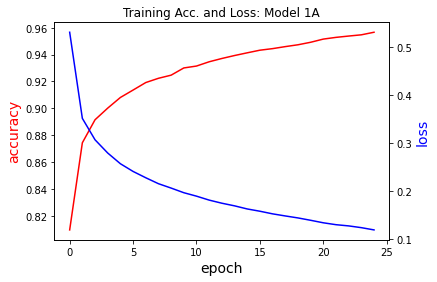

Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5133 - accuracy: 0.8155
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2662 - accuracy: 0.9048
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2194 - accuracy: 0.9214
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1953 - accuracy: 0.9307
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1812 - accuracy: 0.9345
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1594 - accuracy: 0.9409
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1488 - accuracy: 0.9465
Epoch 8/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1346 - accuracy: 0.9521
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1180 - accuracy: 0.9587
Epoch 10/25
1875/1875 [==============================] - 10s 5ms/step - l

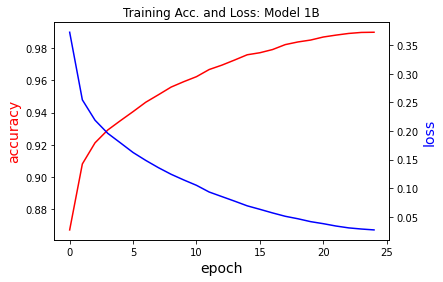

In [ ]:
### Model Compilation code included to allow for fresh reruns ###

tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get networks
model_1a = build_model_1A() 
model_1b = build_model_1B()


# compile networks
model_1a.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model_1b.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# test

perf_and_test(model_1a, "Model 1A")
perf_and_test(model_1b, "Model 1B")

## **Part 2 - Dropout Layers**

In part 2, we will be examining the effect of dropout layers on the performance of the model. Copy your code from the ```build_model_1B()``` method into the ```build_model_2()``` method, and then add dropout layers after each max pooling layer. Model 2 architecture should be:

```
Conv2D
Conv2D
MaxPooling2D((2,2))
Dropout(0.5) <- Add this
Conv2D
Conv2D
MaxPooling2D((2,2))
Dropout(0.5) <- Add this
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax)
```

Note that the we are passing ```0.5``` as an argument to the dropout layers. This means that 50% of the connection between the max pooling and next layer will be dropped.

*Documentation on dropout layers can be found here*: https://keras.io/api/layers/regularization_layers/dropout/

### ***TODO*** Model 2

In [ ]:
def build_model_2():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Dropout(0.5),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Dropout(0.5),
        # !!! Your layers here !!!
        layers.Flatten(),
        layers.Dense(1024),
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summaries


In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_2 = build_model_2() 

# compile network
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 2 Architecture\n")
model_2.summary()




Model 2 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (Non

### **TODO** Global Hyperparameters

Dropout layers, while capable of making the model more robust, also require more training. You should again increase the number of epochs to find a point of diminishing returns.

In [ ]:
EPOCHS = 25

### Testing Model 2


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8133 - accuracy: 0.7043
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4151 - accuracy: 0.8497
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3559 - accuracy: 0.8708
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3100 - accuracy: 0.8864
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2928 - accuracy: 0.8925
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2757 - accuracy: 0.9018
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2636 - accuracy: 0.9044
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2488 - accuracy: 0.9104
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2440 - accuracy: 0.9117
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

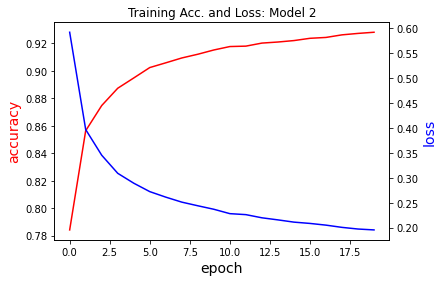

In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_2 = build_model_2() 



# compile network
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_2, "Model 2")

## **Part 3 - Batch Normalization**

In part 3, we will be examining the effect of batch normalization layers on the performance of the model. Copy your code from the ```build_model_1B()``` method into the ```build_model_3()``` method, and then add batch normalization layers after each Conv2D layer. The Model 3 architecture should be:

```
Conv2D
BatchNormalization
Conv2D
BatchNormalization
MaxPooling2D((2,2))
Conv2D
BatchNormalization
Conv2D
BatchNormalization
MaxPooling2D((2,2))
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax)
```
 BatchNormalization layers requires no parameters. 
 
 *Documentation can be found here*: https://keras.io/api/layers/normalization_layers/batch_normalization/

### ***TODO*** Model 3

In [ ]:
def build_model_3():
    return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
       layers.BatchNormalization(),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
       layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
       layers.BatchNormalization(),
        layers.Conv2D(filters=64, activation="relu", padding="same", kernel_size=(3,3)),
       layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # !!! Your layers here !!!
        layers.Flatten(),
        layers.Dense(1024),
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summary



In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_3 = build_model_3() 


# compile network
model_3.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 3 Architecture\n")
model_3.summary()




Model 3 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (Non

### ***TODO*** Global Hyperparameters
 
 Batch normalization has been shown to improve convergence in neural networks, and so the number of training epochs required may be lower than in the other architectures. Again refer to the initial loss plot to find the point of diminishing returns and update the ```EPOCHS``` variable.

In [ ]:
EPOCHS = 25

### Testing Model 3

When looking at the results, take note of the convergence rate during training (can be seen by the decrease in loss per epoch).


Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7211 - accuracy: 0.8092
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3788 - accuracy: 0.8924
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2848 - accuracy: 0.9121
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2270 - accuracy: 0.9262
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1888 - accuracy: 0.9367
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1561 - accuracy: 0.9452
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1324 - accuracy: 0.9526
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1135 - accuracy: 0.9581
Epoch 9/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0933 - accuracy: 0.9671
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - l

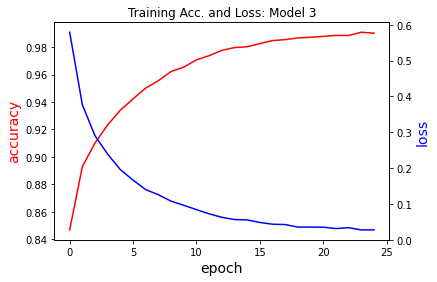

In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_3 = build_model_3() 



# compile network
model_3.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_3, "Model 3")

## **Part 4 - Layer count**

In the final part of this project, you will be looking out how the number of layers affect performance and training time.

In ```build_model_4```, you need to implement the following architecture:

```python
# block 1 - 64 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
#block 2 - 128 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
#block 3 - 256 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
# Dense layers
Flatten
Dense(1024)
Dense(512)
Dense(num_classes, softmax)
```

Notice each block consists of 3 conv2d layers, with 3 batch normalization layers, a maxpooling and dropout layer. The first block should have 32 filters for each Conv2d layer, the second should have 64 filters, and the third should have 128.

### ***TODO*** Model 4

In [ ]:
def build_model_4():
  return tf.keras.Sequential(
    [
        layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

### Model Compilation and Summary



In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_4 = build_model_4() 


# compile network
model_4.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 4 Architecture\n")
model_4.summary()




Model 4 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (Non

### ***TODO*** Global Hyperparameters

Larger models generally require more training as there are more parameters, so you may need to increase the number of training epochs for this model. In addition, more complicated architectures and problem domains can benefit from lower learning rates. Experiment with the learning rate to see if you notice any improvements. Keep in mind that decreasing the learning rate increases the training time, and to fully train your model you may need to increase the number of epochs as well. 

In [ ]:
EPOCHS = 25
LEARNING_RATE = 0.0001

### Testing Model 4


Epoch 1/25
1875/1875 [==============================] - 26s 13ms/step - loss: 1.0390 - accuracy: 0.6356
Epoch 2/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4360 - accuracy: 0.8368
Epoch 3/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3349 - accuracy: 0.8778
Epoch 4/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2865 - accuracy: 0.8954
Epoch 5/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2540 - accuracy: 0.9057
Epoch 6/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2335 - accuracy: 0.9128
Epoch 7/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2117 - accuracy: 0.9211
Epoch 8/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1976 - accuracy: 0.9245
Epoch 9/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1853 - accuracy: 0.9310
Epoch 10/25
1875/1875 [==============================] - 25s 13m

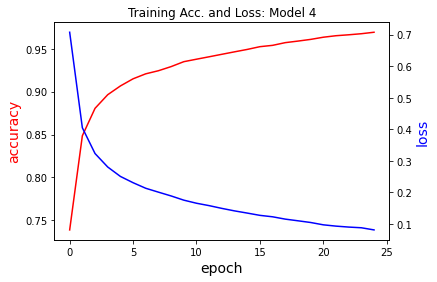

In [ ]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_4 = build_model_4() 



# compile network
model_4.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_4, "Model 4")